In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
# read the data
data = pd.read_pickle("data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]
# normalize the responses
hf_responses_mean = hf_responses.mean().numpy()
hf_responses_std = hf_responses.std().numpy()
hf_responses_scaled = (hf_responses.clone() -
                       hf_responses_mean) / hf_responses_std

In [3]:
# load the trained models
with open("mfdnnbnn_lf1_order_1_50_50.pkl", "rb") as f:
    model_lf1_order1_50 = torch.load(f)
with open("mfdnnbnn_lf1_order_1_512_512_diff.pkl", "rb") as f:
    model_lf1_order_1_512 = torch.load(f)

# load gpr model
with open("gpr_lf1.pkl", "rb") as f:
    gpr_lf1 = torch.load(f)

In [4]:
# get the predictions
mf_bnn_lf1_order1_50_y, mf_bnn_lf1_order1_50_epistemic, mf_bnn_lf1_order1_50_total_unc, mf_bnn_lf1_order1_50_aleatoric = model_lf1_order1_50.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order1_50_ly = model_lf1_order1_50.predict_lf(test_samples)
# print beta of the model
print(f"beta of the model mf_bnn_lf1_order1_50_y : {model_lf1_order1_50.beta}")

mf_bnn_lf1_order_1_512_y, mf_bnn_lf1_order_1_512_epistemic, mf_bnn_lf1_order_1_512_total_unc, mf_bnn_lf1_order_1_512_aleatoric = model_lf1_order_1_512.predict(
    test_samples)
# get the lf prediction
mf_bnn_lf1_order_1_512_ly = model_lf1_order_1_512.predict_lf(test_samples)
# print beta of the model
print(
    f"beta of the model mf_bnn_lf1_order_1_512_y : {model_lf1_order_1_512.beta}")

beta of the model mf_bnn_lf1_order1_50_y : [-0.45250152 -0.13184112]
beta of the model mf_bnn_lf1_order2_50_y : [ 0.01723253 -0.13797019 -0.91014045]
beta of the model mf_bnn_lf2_order1_50_y : [0.45113574 0.85205544]
beta of the model mf_bnn_lf3_order1_50_y : [-0.52330416  0.14815488]
beta of the model mf_bnn_lf1_order_1_512_y : [-0.45233751 -0.13154428]
beta of the model mf_bnn_lf1_order_2_512_y : [ 0.01548978 -0.14048324 -0.9059404 ]
beta of the model mf_bnn_lf2_order_1_512_y : [0.44931883 0.85097446]
beta of the model mf_bnn_lf3_order_1_512_y : [-0.51409876  0.12569637]


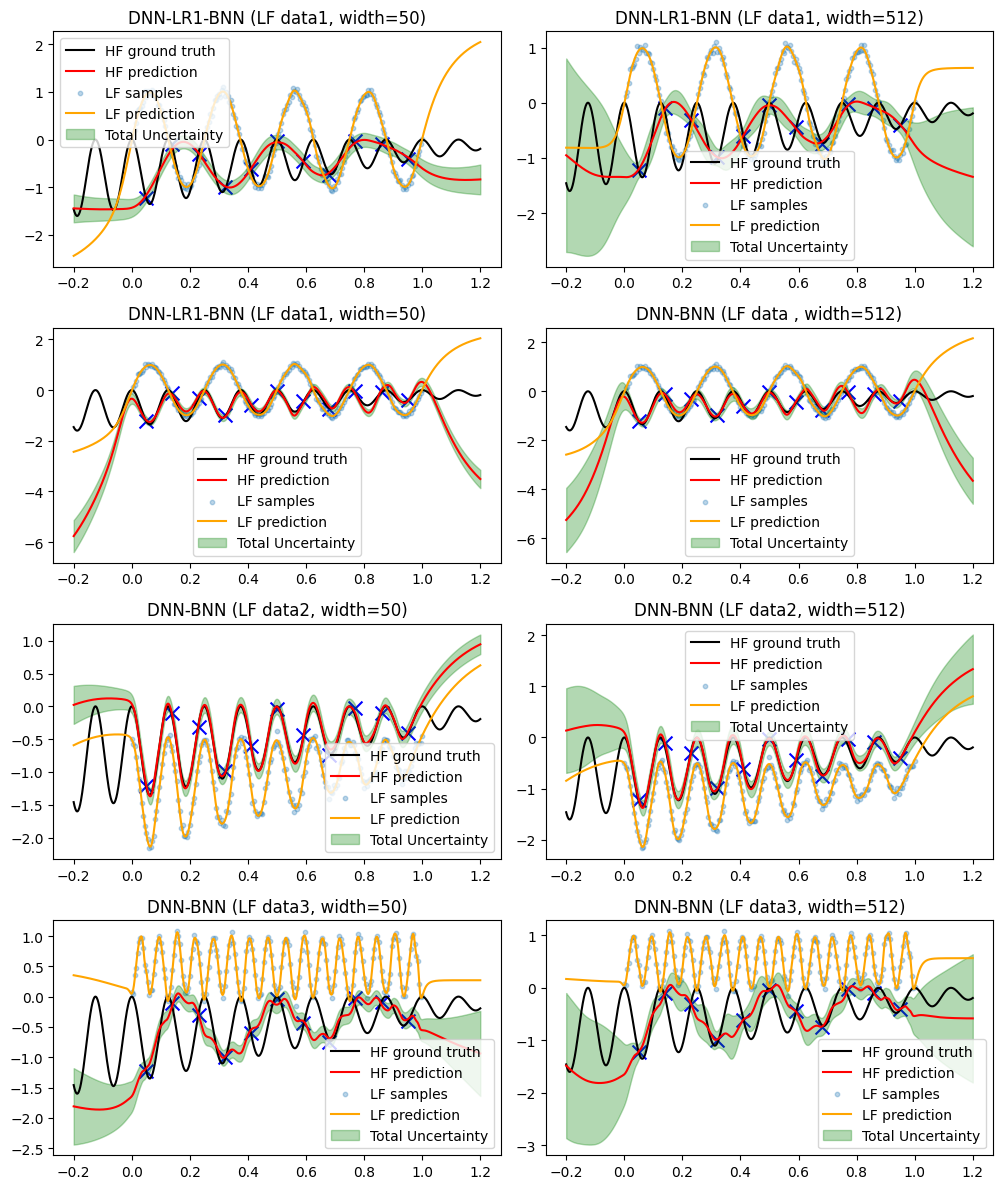

In [5]:
# plot the results into plots with 8 subplots
fig, ax = plt.subplots(4, 2, figsize=(10, 12))
ax[0, 0].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[0, 0].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[0, 0].plot(test_samples,
              mf_bnn_lf1_order1_50_y,
              color='red',
              label="HF prediction")
ax[0, 0].scatter(lf_samples,
                 responses_lf1['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[0, 0].plot(test_samples, mf_bnn_lf1_order1_50_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[0, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order1_50_y - 2 *
                       mf_bnn_lf1_order1_50_total_unc).flatten(),
                      (mf_bnn_lf1_order1_50_y + 2 *
                       mf_bnn_lf1_order1_50_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[0, 0].set_title("DNN-LR1-BNN (LF data1, width=50)")
ax[0, 0].legend()

# plot the second
ax[0, 1].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[0, 1].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[0, 1].plot(test_samples,
              mf_bnn_lf1_order_1_512_y,
              color='red',
              label="HF prediction")
ax[0, 1].scatter(lf_samples,
                 responses_lf1['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[0, 1].plot(test_samples, mf_bnn_lf1_order_1_512_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[0, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order_1_512_y - 2 *
                       mf_bnn_lf1_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf1_order_1_512_y + 2 *
                       mf_bnn_lf1_order_1_512_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[0, 1].set_title("DNN-LR1-BNN (LF data1, width=512)")
ax[0, 1].legend()

# plot the third
ax[1, 0].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[1, 0].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[1, 0].plot(test_samples,
              mf_bnn_lf1_order2_50_y,
              color='red',
              label="HF prediction")
ax[1, 0].scatter(lf_samples,
                 responses_lf1['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[1, 0].plot(test_samples, mf_bnn_lf1_order2_50_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[1, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order2_50_y - 2 *
                       mf_bnn_lf1_order2_50_total_unc).flatten(),
                      (mf_bnn_lf1_order2_50_y + 2 *
                       mf_bnn_lf1_order2_50_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[1, 0].set_title("DNN-LR1-BNN (LF data1, width=50)")
ax[1, 0].legend()

# plot the fourth
ax[1, 1].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[1, 1].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[1, 1].plot(test_samples,
              mf_bnn_lf1_order_2_512_y,
              color='red',
              label="HF prediction")
ax[1, 1].scatter(lf_samples,
                 responses_lf1['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[1, 1].plot(test_samples, mf_bnn_lf1_order_2_512_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[1, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf1_order_2_512_y - 2 *
                       mf_bnn_lf1_order_2_512_total_unc).flatten(),
                      (mf_bnn_lf1_order_2_512_y + 2 *
                       mf_bnn_lf1_order_2_512_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[1, 1].set_title("DNN-BNN (LF data , width=512)")
ax[1, 1].legend()


ax[2, 0].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[2, 0].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[2, 0].plot(test_samples,
              mf_bnn_lf2_order1_50_y,
              color='red',
              label="HF prediction")
ax[2, 0].scatter(lf_samples,
                 responses_lf2['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[2, 0].plot(test_samples, mf_bnn_lf2_order1_50_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[2, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf2_order1_50_y - 2 *
                       mf_bnn_lf2_order1_50_total_unc).flatten(),
                      (mf_bnn_lf2_order1_50_y + 2 *
                       mf_bnn_lf2_order1_50_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[2, 0].set_title("DNN-BNN (LF data2, width=50)")
ax[2, 0].legend()

# plot the second
ax[2, 1].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[2, 1].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[2, 1].plot(test_samples,
              mf_bnn_lf2_order_1_512_y,
              color='red',
              label="HF prediction")
ax[2, 1].scatter(lf_samples,
                 responses_lf2['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[2, 1].plot(test_samples, mf_bnn_lf2_order_1_512_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[2, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf2_order_1_512_y - 2 *
                       mf_bnn_lf2_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf2_order_1_512_y + 2 *
                       mf_bnn_lf2_order_1_512_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[2, 1].set_title("DNN-BNN (LF data2, width=512)")
ax[2, 1].legend()

# plot the third
ax[3, 0].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[3, 0].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[3, 0].plot(test_samples,
              mf_bnn_lf3_order1_50_y,
              color='red',
              label="HF prediction")
ax[3, 0].scatter(lf_samples,
                 responses_lf3['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[3, 0].plot(test_samples, mf_bnn_lf3_order1_50_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[3, 0].fill_between(test_samples.flatten(),
                      (mf_bnn_lf3_order1_50_y - 2 *
                       mf_bnn_lf3_order1_50_total_unc).flatten(),
                      (mf_bnn_lf3_order1_50_y + 2 *
                       mf_bnn_lf3_order1_50_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[3, 0].set_title("DNN-BNN (LF data3, width=50)")
ax[3, 0].legend()

# plot the fourth
ax[3, 1].plot(test_samples,
              test_hf_responses_noiseless,
              'k', label="HF ground truth")
# plot hf samples
ax[3, 1].scatter(hf_samples.numpy(),
                 hf_responses.numpy(),
                 color="b",
                 marker="x",
                 s=100)
ax[3, 1].plot(test_samples,
              mf_bnn_lf3_order_1_512_y,
              color='red',
              label="HF prediction")
ax[3, 1].scatter(lf_samples,
                 responses_lf3['lf'],
                 alpha=0.3,
                 s=10,
                 label="LF samples")
ax[3, 1].plot(test_samples, mf_bnn_lf3_order_1_512_ly.detach().numpy(),
              color="orange",
              label="LF prediction")
# uncertainty  of hf
ax[3, 1].fill_between(test_samples.flatten(),
                      (mf_bnn_lf3_order_1_512_y - 2 *
                       mf_bnn_lf3_order_1_512_total_unc).flatten(),
                      (mf_bnn_lf3_order_1_512_y + 2 *
                       mf_bnn_lf3_order_1_512_total_unc).flatten(),
                      color='green', alpha=0.3, label="Total Uncertainty")
ax[3, 1].set_title("DNN-BNN (LF data3, width=512)")
ax[3, 1].legend()
plt.tight_layout()
# save the plot
plt.savefig("proposed_method_lf_model_comparison.png",
            dpi=300,
            bbox_inches='tight')
plt.show()